# Summary

There are 3 implementations: 
    manual  `/Users/new/science/studies/otsebriy/conductor_tools/collaborative_filtering.py`
    surprise `/Users/new/science/studies/otsebriy/conductor_tools/collaborative_filtering_surprise.py` 
    fastai `/Users/new/science/studies/otsebriy/conductor_tools/collaborative_filtering_fastai.py`
    
compared for  `/Users/new/science/studies/otsebriy/conductor_tools/cats/1895_estimate_msv_for_pmi_keywords/filmtrust/ratings.txt`

results evaluated on input data:
- Manual `r2_score = 0.8581286078865904`
- Surprise `r2_score = 0.48986699862992766`
- fastai `R2 score = -0.3079793034262268`




    
    

# Learning collaborative filtering 
lets replicate the lesson from machine learning by A.Ng
ex_8 lecture 16 

Note: there is separate file used for estimating PMI MSV: 
`/Users/new/science/studies/otsebriy/conductor_tools/collaborative_filtering_b.py`

There are 3 main approaches 
- simple - by popularity and some other metrics 
- content based (when you assign features to movies e.g. ganre etc.)
- collaborative filtering (it is easy to understand as extension to content based approach). It allows to learn fatures of movies $X$ and parameters forusers $\Theta$ simultaneously. 

You may also see the `surprise` library for python  or `fastai` implementation 


#### matlab sample of current implementation
/Users/new/main_python_git/github/storage/octave_work/Artifacts/machine-learning-ex8/machine-learning-ex8/


### =============== Part 1: Loading movie ratings dataset ================
You will start by loading the movie ratings dataset to understand the structure of the data.

In [ ]:
from scipy.io import loadmat
import pandas as pd
mat= loadmat('ex8_movies.mat') # returns dict - just select proper key to get necessary data
# returns dict! print (mat.keys()): ['__header__', '__version__', '__globals__', 'X', 'y']

In [4]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Y', 'R'])

In [ ]:
def get_data():
    mat= loadmat('ex8_movies.mat') # returns dict - just select proper key to get necessary data
    Y= pd.DataFrame( mat['Y']) # value  vertical (axis 0):  movies 1682. Every row is for one movie , horizontal (axis 1): Users 943, every column is for one user  
    R= pd.DataFrame( mat['R']) #  flag of reviewed or not  vertical (axis 0):  movies 1682. Every row is for one movie , horizontal (axis 1): Users 943, every column is for one user  
    # Data explanation:  
    # The matrix Y (a num movies × num users matrix) stores the ratings y(i,j) (from 1 to 5). actually from 0 to 5 
    # The matrix R is an binary-valued indicator matrix, where R(i, j) = 1 if user j gave a rating to movie i, and R(i, j) = 0 otherwise
    # y[i,j] is defined if r[i,j] == 1

    # convert to float to avoid issues with uint type  
    Y= Y.astype(float).values 
    R= R.astype(float).values

    return Y,R

Y,R= get_data()



In [ ]:
print (Y.shape)
print (Y)
set(Y.ravel())

In [ ]:
print (R.shape)
print (R)
set(R.ravel())

## X and $\Theta$
$X$ - movies 
$\Theta$ - users 

The i-th row of $X$ corresponds to the feature vector $x_i$ for the $i-th$ movie, 

and the $j-th$ column of $\Theta$ corresponds to one parameter vector $θ_j$, for the $j-th$ user. 

Both $x_i$ and $\theta_j$ are n-dimensional vectors. For the purposes of this exercise, you will use n = 100, and therefore <br>$x_i$ ∈ $R^{100}$ and $\theta_j$ ∈ $R^{100}$. 

$X.shape$ = $[n_m × 100]$ 
<br>$\Theta.shape$ = $[100×n_u ]$



$y[i,j] = x[i]\quad @ \quad \theta[j] $

$Y= X\quad @ \quad \Theta$
y.shape =  $[n_m, n_u]$



### ============ Part 2: Collaborative Filtering Cost Function ===========

You will now implement the cost function for collaborative filtering.
To help you debug your cost function, we have included set of weights
that we trained on that. Specifically, you should complete the code in 
cofiCostFunc.m to return J.

In [177]:
# Obsolete ! 
def J_obs (params):     # 
    '''
    params: 1d vector  of X and Theta 
    :return expression for cost function 
    '''
#     print ('num_users, num_movies, num_features', num_users, num_movies, num_features)
    X= params[:num_movies*num_features].reshape(num_movies,num_features)
    Theta = params[num_movies*num_features:].reshape(num_features,num_users)
    
    assert(X.shape[1]==Theta.shape[0])
    h= X @ Theta 

#     print ('h.shape {}, Y.shape {}'.format(h.shape, Y.shape) )
    try: 
        assert(h.shape ==Y.shape)
    except:
        print ('h.shape {} !=Y.shape {}'.format(h.shape, Y.shape) )

#     print ('h-Y\n', (h-Y))# 
#     print ('(h-Y)*R\n', (h-Y)*R)
#     print ('((h-Y)*R) **2\n', ((h-Y)*R) **2)
    
        
    J= 1/2 * np.sum(((h-Y)*R) **2) + lambd/2 * np.sum(X**2) + lambd/2 * np.sum(Theta**2)
    print (J)
    try: 
        assert(len(J.shape)== 0)
    except:
        print ('J is not raw number. J.shape = ', J.shape)
    
    return J


#### Test the cost function by provided weights 

In [123]:
mat= loadmat('ex8_movieParams.mat') # returns dict - just select proper key to get necessary data
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'Theta', 'num_users', 'num_movies', 'num_features'])

In [145]:
X= pd.DataFrame( mat['X']).astype(float).values 
# ====== Note: I use theta T as oposite to sample 
Theta= pd.DataFrame(mat['Theta']).astype(float).values.T 
# num_users= pd.DataFrame(mat['num_users']).astype(int).values[0][0]
# num_movies= pd.DataFrame(mat['num_movies']).astype(int).values[0][0]
# num_features= pd.DataFrame(mat['num_features']).astype(int).values[0][0]
num_users = 4
num_movies = 5
num_features = 3
lambd = 0

X = X[:num_movies,:num_features]

Theta = Theta[:num_features,:num_users]

Y = Y[:num_movies, :num_users]
R = R[:num_movies, :num_users]

X.shape, Theta.shape, num_users, num_movies, num_features, 

((5, 3), (3, 4), 4, 5, 3)

In [139]:
X

array([[ 1.0486855 , -0.40023196,  1.19411945],
       [ 0.78085123, -0.38562591,  0.52119779],
       [ 0.64150886, -0.54785385, -0.08379638],
       [ 0.45361782, -0.80021844,  0.68048129],
       [ 0.93753789,  0.1060899 ,  0.36195295]])

In [140]:
Theta

array([[ 0.28544362,  0.50501321, -0.43191656,  0.72859839],
       [-1.68426509, -0.45464846, -0.47880449, -0.27189391],
       [ 0.26293877,  0.31746244,  0.84671111,  0.3268436 ]])

In [141]:
X@ Theta

array([[ 1.28741759,  1.09065296,  0.74976242,  1.2631815 ],
       [ 1.00942836,  0.73512514,  0.28868079,  0.84412644],
       [ 1.0838124 ,  0.54644916, -0.08571474,  0.58897213],
       [ 1.6561872 ,  0.80892833,  0.76339419,  0.77049069],
       [ 0.18410216,  0.54014188, -0.14926488,  0.7725454 ]])

In [142]:
Y

array([[5., 4., 0., 0.],
       [3., 0., 0., 0.],
       [4., 0., 0., 0.],
       [3., 0., 0., 0.],
       [3., 0., 0., 0.]])

In [143]:
import numpy as np
params = np.r_[X.reshape(-1),Theta.reshape(-1)]
params.shape, params

((27,), array([ 1.0486855 , -0.40023196,  1.19411945,  0.78085123, -0.38562591,
         0.52119779,  0.64150886, -0.54785385, -0.08379638,  0.45361782,
        -0.80021844,  0.68048129,  0.93753789,  0.1060899 ,  0.36195295,
         0.28544362,  0.50501321, -0.43191656,  0.72859839, -1.68426509,
        -0.45464846, -0.47880449, -0.27189391,  0.26293877,  0.31746244,
         0.84671111,  0.3268436 ]))

In [151]:
J(params)

h.shape (5, 4), Y.shape (5, 4)
h-Y
 [[-3.71258241 -2.90934704  0.74976242  1.2631815 ]
 [-1.99057164  0.73512514  0.28868079  0.84412644]
 [-2.9161876   0.54644916 -0.08571474  0.58897213]
 [-1.3438128   0.80892833  0.76339419  0.77049069]
 [-2.81589784  0.54014188 -0.14926488  0.7725454 ]]
(h-Y)*R
 [[-3.71258241 -2.90934704  0.          0.        ]
 [-1.99057164  0.          0.          0.        ]
 [-2.9161876   0.         -0.          0.        ]
 [-1.3438128   0.          0.          0.        ]
 [-2.81589784  0.         -0.          0.        ]]
((h-Y)*R) **2
 [[13.78326812  8.46430022  0.          0.        ]
 [ 3.96237545  0.          0.          0.        ]
 [ 8.50415014  0.          0.          0.        ]
 [ 1.80583285  0.          0.          0.        ]
 [ 7.92928067  0.          0.          0.        ]]


22.224603725685675

In [167]:
from scipy.optimize import minimize

In [165]:
# DOes not work 
def fit():
    '''
    :return: True in case of successful fit 
    '''      
    params = np.r_[X.reshape(-1),Theta.reshape(-1)]

    print  ('start minimizing')
    sol = minimize(J, params, method='BFGS',options= {'eps':1e-3}) # minimize ‘Nelder-Mead', 'SLSQP',BFGS
    res = sol.x
    print  ('res= ',res)
    print  ('minimizing completed')


#     intercept_= res[0]
#     coef_ = res[1:].reshape(1,-1)
    
    return res

In [172]:
Y, R= get_data()
print ('Y.shape={}, R.shape={}'.format(Y.shape, R.shape))
num_movies,num_users =Y.shape
num_features= 10
X = np.random.randn(num_movies, num_features)
Theta = np.random.randn( num_features, num_users)
print ('X.shape={}, Theta.shape={}'.format(X.shape, Theta.shape))
lambd=.01
fit()

Y.shape=(1682, 943), R.shape=(1682, 943)
X.shape=(1682, 10), Theta.shape=(10, 943)
start minimizing
1216026.1882775228
1216026.1434908784
1216025.5661481218
1216025.560060133
1216026.6388374195
1216026.6267706624
1216026.2537223906
1216025.941833476
1216026.061950623
1216025.9859544274
1216026.0901362274
1216026.1851737117
1216026.0520817027
1216026.194122999
1216026.1308910006
1216026.2253878317
1216026.368655603
1216026.154982757
1216026.0407998154
1216026.0638848094
1216025.9645283455
1216026.1420676296
1216026.0737807197
1216026.3703353952
1216026.1537875587
1216026.0970177748
1216026.0043044644
1216026.0986103825
1216026.275027268
1216026.1445397972
1216026.1773895677
1216026.502424772
1216025.4490767282
1216026.0372738456
1216026.0062073537
1216026.4202891781
1216026.4377956414
1216026.2500560058
1216026.04925033
1216025.9700968538
1216026.4629362677
1216026.150811346
1216026.138958188
1216026.024539196
1216026.1530987688
1216026.243331593
1216026.2152878435
1216026.3699768207
12

1216026.1870035117
1216026.2449068858
1216026.1294886924
1216026.0893558888
1216026.1675754383
1216026.2030023017
1216026.174455573
1216026.1988159544
1216026.2012578237
1216026.105868145
1216026.3068605585
1216026.158945763
1216026.0327888122
1216026.2728369
1216026.1929211526
1216026.115825075
1216026.100662164
1216026.1239058455
1216026.1878760054
1216026.2111373907
1216026.180461219
1216026.2762608489
1216026.100088046
1216026.1974062372
1216026.1613994525
1216026.2054580075
1216026.2282046166
1216026.195568184
1216026.3062652298
1216026.2144012763
1216025.9681767516
1216026.1128053267
1216026.2080958576
1216026.1597341483
1216026.247136414
1216026.416929644
1216026.262065866
1216026.094991619
1216026.2676078903
1216026.0765651003
1216026.2243152012
1216025.9133442834
1216026.125748163
1216026.3480366631
1216026.2689966548
1216026.1216605927
1216026.2843281643
1216026.3721878575
1216026.0956702477
1216026.2454551351
1216026.1796882746
1216026.1786161186
1216026.2544290577
1216026.1

KeyboardInterrupt: 

looks like minimize does not converge - so lets use gd 

### ============== Part 3: Collaborative Filtering Gradient ==============
complete the code in cofiCostFunc.m to return the grad argument.
 


$$\frac{\partial J}{\partial X}=((X @ \Theta-Y)*R) @ \Theta^{T}, \quad
\frac{\partial J}{\partial \theta}= \left( ((X @ \Theta-Y)*R)^{T} @ X \right)^{T}  $$

In [196]:
def J (Y, R, X,Theta, lambd): 
    '''
    params: 1d vector  of X and Theta 
    :return expression for cost function 
    '''
#     print ('num_users, num_movies, num_features', num_users, num_movies, num_features)
#     X= params[:num_movies*num_features].reshape(num_movies,num_features)
#     Theta = params[num_movies*num_features:].reshape(num_features,num_users)
    
    assert(X.shape[1]==Theta.shape[0])
    h= X @ Theta 

#     print ('h.shape {}, Y.shape {}'.format(h.shape, Y.shape) )
    try: 
        assert(h.shape ==Y.shape)
    except:
        print ('h.shape {} !=Y.shape {}'.format(h.shape, Y.shape) )

#     print ('h-Y\n', (h-Y))
#     print ('(h-Y)*R\n', (h-Y)*R)
#     print ('((h-Y)*R) **2\n', ((h-Y)*R) **2)
    
        
    J= 1/2 * np.sum(((h-Y)*R) **2) + lambd/2 * np.sum(X**2) + lambd/2 * np.sum(Theta**2)
#     print (J)
    try: 
        assert(len(J.shape)== 0)
    except:
        print ('J is not raw number. J.shape = ', J.shape)
    
    return J

def J_derivative(Y,R,X, Theta, num_movies, num_users, num_features, lambd): 
   
    cost_matr= (X @ Theta - Y) * R #  n_movies * n_users 

    X_grad= cost_matr @ Theta.T 
    Theta_grad= (cost_matr.T @ X).T
    
   
    try: 
        assert(X_grad.shape ==X.shape)
        assert(Theta_grad.shape ==Theta.shape)
    except:
        print ('Check gradient calculus')

    # Regularization part :          
    X_grad  += lambd * X
    Theta_grad += lambd * Theta

    
    return X_grad, Theta_grad


In [400]:
def fit(Y,R, num_features= 10,  alpha=0.0001, lambd= .01, eps= .1,  max_iter=1000,step=100, verbose=0):    
    num_movies,num_users =Y.shape
    
    
    if verbose: 
        print ('Running gradient descent with alpha= {}, lambda= {}, eps= {}, max_iter= {}'.format(
            alpha, lambd, eps, max_iter))
        

    #     X= params[:num_movies*num_features].reshape(num_movies,num_features)
    #     Theta = params[num_movies*num_features:].reshape(num_features,num_users)

    np.random.seed(2019)
    X = np.random.randn(num_movies, num_features)
    Theta = np.random.randn( num_features, num_users)
    
    J_hist=[-1] # used for keeping J values. Init with -1 to avoid 0 at first iter
    continue_iter = True # flag to continue next iter (grad desc step)
    iter_number =0 # used for limit by max_iter

    while continue_iter:            
        # Do step of gradient descent    
        X_grad, Theta_grad =  J_derivative(Y,R,X, Theta, num_movies, num_users, num_features, lambd)
        X= X- alpha  *X_grad        
        Theta= Theta- alpha  *Theta_grad

        # keep history of J values
        J_hist.append(J(Y, R, X,Theta, lambd))
        # check criteria of exit (finish grad desc)
        if iter_number> max_iter: # if limit succeeded
            continue_iter = False
            print ('iter_number> max_iter')
        elif np.abs(J_hist[iter_number-1] - J_hist[iter_number])< eps: # if accuracy is succeeded
            continue_iter = False
            print ('J_hist[iter_number]={}'.format(J_hist[iter_number]))
        iter_number += 1
        
        if verbose and iter_number%step ==0:
            print ('{}: {}'.format(iter_number, J_hist[iter_number-1]))
    
    return X,Theta, J_hist

### X,Theta, J_hist = fit(Y,R, alpha=0.001, lambd= .1,max_iter= 5000, verbose=1)

In [226]:
pred= X@ Theta

In [227]:
pred[:20,:10]

array([[ 4.18567139,  4.11857954,  3.07106986,  4.91565653,  3.50898082,
         3.52614586,  4.37783849,  4.26249634,  5.36769121,  4.29376196],
       [ 2.9244515 ,  3.04456704,  2.91751732,  3.90221841,  3.41125682,
         2.40027677,  3.60821712,  3.14072047,  4.22740975,  3.46591501],
       [ 2.41860207,  2.08504399,  3.25459874,  1.77745671,  2.37471314,
         1.35484055,  2.58067304,  2.2089375 ,  2.08560402,  2.53757069],
       [ 4.31484112,  3.84691542,  2.72807486,  4.46978225,  3.04473374,
         3.37788696,  3.67443778,  4.58928972,  3.62319048,  3.89187641],
       [ 2.53101147,  3.46579646,  2.92480082,  2.9535054 ,  2.55998163,
         2.1073809 ,  4.13691251,  2.5000918 ,  3.62914304,  3.87040853],
       [ 3.65411276,  2.77603468, -0.24227392,  1.44810909, -1.06304948,
         3.02305151,  2.93546874,  0.40149154,  4.89220038,  3.08171687],
       [ 4.39445044,  4.19501605,  3.52366444,  4.1326789 ,  4.4810348 ,
         3.37867545,  4.36494492,  4.29876766

In [228]:
Y[:20,:10]

array([[5., 4., 0., 0., 4., 4., 0., 0., 0., 4.],
       [3., 0., 0., 0., 3., 0., 0., 0., 0., 0.],
       [4., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [3., 0., 0., 0., 0., 0., 5., 0., 0., 4.],
       [3., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [5., 0., 0., 0., 0., 0., 0., 0., 5., 0.],
       [4., 0., 0., 0., 0., 2., 5., 3., 4., 4.],
       [1., 0., 0., 0., 0., 4., 5., 0., 0., 0.],
       [5., 0., 0., 0., 0., 4., 5., 0., 0., 4.],
       [3., 2., 0., 0., 0., 0., 4., 0., 0., 0.],
       [2., 0., 0., 4., 0., 0., 3., 3., 0., 4.],
       [5., 0., 0., 0., 0., 4., 5., 0., 0., 5.],
       [5., 4., 0., 0., 0., 2., 0., 0., 0., 3.],
       [5., 4., 0., 0., 0., 5., 0., 0., 0., 0.],
       [5., 0., 0., 0., 0., 3., 0., 0., 0., 0.],
       [5., 0., 0., 0., 0., 0., 0., 0., 0., 4.],
       [3., 0., 0., 0., 4., 0., 0., 0., 0., 0.],
       [4., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [5., 3., 0., 0., 0., 4., 0., 0., 0., 0.],
       [4., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [229]:
np.abs(pred-Y).max()

18.58398971165899

In [251]:
sorted(pred.ravel())


[-16.100857849312607,
 -14.996359649874345,
 -14.727280724765203,
 -14.568719637421097,
 -14.25105285039019,
 -14.250009848685055,
 -14.156624980669372,
 -14.108897669069862,
 -13.843492713674827,
 -13.804958890696883,
 -13.63936489297259,
 -13.50542728806603,
 -13.416752938126782,
 -13.38770634330417,
 -13.200555527925545,
 -13.022181705113498,
 -13.00768566411482,
 -12.795117341669537,
 -12.755134010453254,
 -12.59019591998216,
 -12.449823240798958,
 -12.204345560175259,
 -12.162773721593092,
 -12.116518454928572,
 -12.10452730038031,
 -12.101856105550285,
 -12.0764724095366,
 -12.058867210062177,
 -12.046616641487068,
 -12.020294282183558,
 -11.977498927500047,
 -11.884212006275494,
 -11.87149597949762,
 -11.846805443333723,
 -11.841633088500515,
 -11.837403345165628,
 -11.808646187531187,
 -11.760407217107344,
 -11.70482187664827,
 -11.581594131702555,
 -11.581211864747337,
 -11.572736756711786,
 -11.549479610203761,
 -11.51279488321197,
 -11.47147466737586,
 -11.46466121591302,
 -

### Read movies names 

In [373]:
fn ='movie_ids.txt'

doc = []
with open(fn, 'r', encoding='utf-8', errors='ignore') as file:
    for line in file:
        doc.append(' '.join(line.rstrip().split(' ')[1:]))
df_movie_names = pd.DataFrame(doc)

  
df_movie_names



,0
0,Toy Story (1995)
1,GoldenEye (1995)
2,Four Rooms (1995)
3,Get Shorty (1995)
4,Copycat (1995)
5,Shanghai Triad (Yao a yao yao dao waipo qiao) ...
6,Twelve Monkeys (1995)
7,Babe (1995)
8,Dead Man Walking (1995)
9,Richard III (1995)


## ============== Part 6: Entering ratings for a new user ===============

In [433]:
def build_my_raitings():
    my_ratings = np.zeros((1682, 1))
    # % Check the file movie_idx.txt for id of each movie in our dataset
    # % For example, Toy Story (1995) has ID 1, so to rate it "4", you can set

    my_ratings[0] = 4
    my_ratings[97] = 2
    my_ratings[6] = 3
    my_ratings[11]= 5
    my_ratings[53] = 4
    my_ratings[63]= 5
    my_ratings[65]= 3
    my_ratings[68] = 5
    my_ratings[182] = 4
    my_ratings[225] = 5
    my_ratings[354]= 5
    return my_ratings
my_ratings= build_my_raitings()

print ('\n\nNew user ratings:\n')
for i in range(len(my_ratings)):
    if my_ratings[i] > 0:
        print('Rated {} for {}\n'.format(int(my_ratings[i][0]),df_movie_names.iloc[i].values[0]))




New user ratings:

Rated 4 for Toy Story (1995)

Rated 3 for Twelve Monkeys (1995)

Rated 5 for Usual Suspects, The (1995)

Rated 4 for Outbreak (1995)

Rated 5 for Shawshank Redemption, The (1994)

Rated 3 for While You Were Sleeping (1995)

Rated 5 for Forrest Gump (1994)

Rated 2 for Silence of the Lambs, The (1991)

Rated 4 for Alien (1979)

Rated 5 for Die Hard 2 (1990)

Rated 5 for Sphere (1998)



array([[4.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [374]:
my_ratings.shape, y.shape, np.c_[my_ratings,Y].shape


((1682, 1), (1682, 943), (1682, 945))

In [439]:
# Add our own ratings to the data matrix

def add_my_ratings(Y,R,my_ratings):
    Y = np.c_[my_ratings,Y]
    R = np.c_[my_ratings !=0 , R]
    return Y, R 
        
Y,R= get_data()    
my_ratings= build_my_raitings()
Y, R = add_my_ratings(Y,R,my_ratings)

In [435]:
R.shape

(1682, 944)

In [436]:
def normalize_Y(Y,R, num_movies):
    Ymean = np.zeros((num_movies, 1))
    Ynorm = np.zeros(Y.shape)
    for i in range(num_movies):
        idx = R[i,:] == 1
        Ymean[i] = Y[i, idx].mean()
        Ynorm[i, idx]= Y[i, idx] - Ymean[i]
    return Ymean, Ynorm
Ymean, Ynorm = normalize_Y(Y,R, num_movies)

In [383]:
%matplotlib inline 
import matplotlib.pyplot as plt
def draw_cost_changes(J_hist):
    J_hist=J_hist[1:]
    plt.figure()
    plt.scatter(np.arange(0,len(J_hist)),J_hist,s=20,marker='.',c='b')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
#     title_str = 'Complited: {}, alpha ={}, max_iter={}, eps={}'.format( len(self.J_hist)-2, self.alpha, self.max_iter,self.eps)
#     # Note: len(J_hist)-2) due to first one is -1 (was not iteration), iter + 1  at the end  of the gradient loop
#     plt.title(title_str)


    

Running gradient descent with alpha= 0.001, lambda= 1, eps= 0.1, max_iter= 2000
100: 47744.30370564893
200: 40739.94442626788
300: 36688.138201807444
400: 34027.55465127855
500: 32242.64626938111
600: 30985.511163730247
700: 30066.366177764437
800: 29380.467086385906
900: 28863.79311913726
1000: 28471.767597709906
1100: 28171.060707043143
1200: 27937.10799783192
1300: 27752.452127851502
1400: 27604.771031761204
1500: 27485.19000201551
1600: 27387.186634858623
1700: 27305.916733824204
1800: 27237.753915785004
1900: 27179.954620525816
2000: 27130.418627436728
iter_number> max_iter


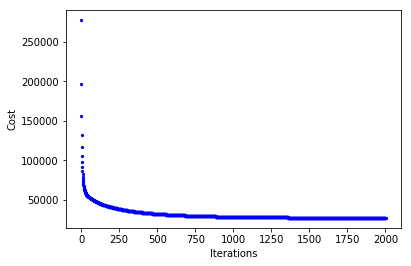

In [460]:
Y,R= get_data()    
my_ratings= build_my_raitings()
Y, R = add_my_ratings(Y,R,my_ratings)
Ymean, Ynorm = normalize_Y(Y,R, num_movies)

X,Theta, J_hist= fit(Ynorm , R, alpha=0.001, lambd= 1,max_iter= 2000, eps= .1, verbose=1)
# X,Theta, J_hist= fit(Y , R, alpha=0.0015, lambd= 10,max_iter= 2000, eps= .1, step = 100, verbose=1)
draw_cost_changes(J_hist)

In [461]:

pred= X @ Theta
my_pred = pred[:,0] + Ymean.ravel()
print(my_pred.shape)

top_pred= np.argsort(my_pred)[::-1]
print('\nTop recommendations for you:\n')
for i in range(100):
    j = top_pred[i]
    print('Predicting rating {:.2} for movie {} (# {})\n'.format(my_pred[j],df_movie_names.iloc[j],j))


(1682,)

Top recommendations for you:

Predicting rating 5.5 for movie 0    Three Caballeros, The (1945)
Name: 623, dtype: object (# 623)

Predicting rating 5.3 for movie 0    Aiqing wansui (1994)
Name: 1535, dtype: object (# 1535)

Predicting rating 5.2 for movie 0    In Love and War (1996)
Name: 1151, dtype: object (# 1151)

Predicting rating 5.2 for movie 0    Lost in Space (1998)
Name: 915, dtype: object (# 915)

Predicting rating 5.2 for movie 0    They Made Me a Criminal (1939)
Name: 1121, dtype: object (# 1121)

Predicting rating 5.1 for movie 0    Great Day in Harlem, A (1994)
Name: 813, dtype: object (# 813)

Predicting rating 5.0 for movie 0    Entertaining Angels: The Dorothy Day Story (1996)
Name: 1652, dtype: object (# 1652)

Predicting rating 5.0 for movie 0    Santa with Muscles (1996)
Name: 1499, dtype: object (# 1499)

Predicting rating 5.0 for movie 0    Prefontaine (1997)
Name: 1188, dtype: object (# 1188)

Predicting rating 4.9 for movie 0    Star Wars (1977)
Name: 

In [463]:
pred + Ymean

array([[3.98916346, 3.74469241, 4.00925263, ..., 4.42724577, 4.61707789,
        3.13710605],
       [3.88140499, 2.66853141, 3.62523619, ..., 3.46024384, 3.98720527,
        3.55623878],
       [3.77800704, 2.99527548, 2.2079147 , ..., 3.4535752 , 2.88097513,
        3.04133732],
       ...,
       [2.17429086, 1.96126538, 2.04356452, ..., 2.09903431, 2.11095939,
        1.81730458],
       [2.69175157, 2.76487345, 2.88383036, ..., 2.86845198, 3.05135571,
        3.21564147],
       [3.14222905, 2.87368523, 3.07316958, ..., 3.09905865, 3.0484917 ,
        3.02383327]])

## Note: I don't know why the results are different than in matlab 
I don't know how to get titanic on first place !
Looks like smth wrong !
But I have no idea what to do ((( 
```
Top recommendations for you:
Predicting rating 9.0 for movie Titanic (1997)
Predicting rating 8.9 for movie Star Wars (1977)
Predicting rating 8.8 for movie Shawshank Redemption, The (1994) 
Predicting rating 8.5 for movie As Good As It Gets (1997) 
Predicting rating 8.5 for movie Good Will Hunting (1997) 
Predicting rating 8.5 for movie Usual Suspects, The (1995) 
Predicting rating 8.5 for movie Schindler’s List (1993)
Predicting rating 8.4 for movie Raiders of the Lost Ark (1981) 
Predicting rating 8.4 for movie Empire Strikes Back, The (1980) 
Predicting rating 8.4 for movie Braveheart (1995)```


In [397]:
# my_pred, pred[:,0],Ymean.ravel()
Ymean.ravel()[312]

4.2457142857142856

In [406]:
pred+ Ymean

array([[3.89920998, 4.02905561, 3.93667846, ..., 4.30909409, 4.71846674,
        3.18759266],
       [3.46236513, 2.88637539, 3.32168122, ..., 3.44583126, 3.92253624,
        3.58301528],
       [3.46667729, 2.97008208, 2.70456702, ..., 3.20012104, 2.97826306,
        3.06044709],
       ...,
       [2.00004283, 2.00002339, 1.99999585, ..., 2.00001014, 2.00002324,
        1.99993671],
       [2.99994334, 2.99990167, 2.99999835, ..., 2.99999119, 3.00002638,
        3.00004067],
       [3.0000203 , 2.99993985, 2.99999869, ..., 3.0000075 , 3.00001   ,
        3.00004541]])

In [408]:
# Lets test it on small set 

In [441]:
Y= np.array([
    [5,5,1,1],
    [5,5,1,1],
    [1,1,5,5],
    [1,1,5,5]  
])
R = np.vectorize(lambda x: 1 if x>1 else 0)(Y)
Y, R

(array([[5, 5, 1, 1],
        [5, 5, 1, 1],
        [1, 1, 5, 5],
        [1, 1, 5, 5]]), array([[1, 1, 0, 0],
        [1, 1, 0, 0],
        [0, 0, 1, 1],
        [0, 0, 1, 1]]))

Running gradient descent with alpha= 0.1, lambda= 0.1, eps= 0.001, max_iter= 2000
100: 0.8802093397302286
J_hist[iter_number]=0.7360748235853183


array([[-7.43497023e-04, -4.57414006e-04,  1.01650954e-03,
        -9.05198445e-04, -1.39562295e-04,  2.43600168e-04,
        -4.30139365e-05,  8.01563164e-04,  1.18244993e-02,
         1.00819719e-02],
       [-5.72962736e-02, -6.70059928e-02, -7.52655651e-02,
        -3.95827410e-02, -1.12976620e-01, -2.94141672e-02,
         1.09509414e-06, -3.91601350e-06,  1.47057740e-01,
         1.94842217e-01],
       [-9.85837245e-01, -9.85617198e-01, -9.84579780e-01,
        -9.85587281e-01, -9.85632521e-01, -9.85547095e-01,
        -1.93368593e-02, -1.35421102e-01,  2.95660177e+00,
         2.95702807e+00],
       [-9.85122331e-01, -9.85582222e-01, -9.86368861e-01,
        -9.85380312e-01, -9.85453524e-01, -9.85912296e-01,
         1.98227155e-03, -1.26305184e-01,  2.95685581e+00,
         2.95645511e+00]])

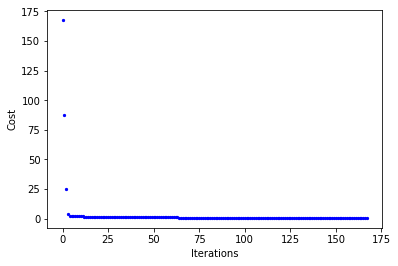

In [447]:
my_ratings = np.zeros((4, 1))

my_ratings[0] = 5
my_ratings[2] = 1
my_ratings[3]= 1
my_ratings

Y, R = add_my_ratings(Y,R,my_ratings)

Ymean, Ynorm = normalize_Y(Y,R, num_movies=4)

X,Theta, J_hist= fit(Ynorm , R, alpha=0.1, lambd= 0.1,max_iter= 2000, eps= .001, verbose=1)

draw_cost_changes(J_hist)

pred= X@ Theta
my_pred = pred[:,0] + Ymean.ravel()



In [450]:

top_pred= np.argsort(my_pred)[::-1]
print('\nTop recommendations for you:\n')
for i in range(4):
    j = top_pred[i]
    print('Predicting rating {:.2} for # {}\n'.format(my_pred[j],j))

my_ratings    


Top recommendations for you:

Predicting rating 5.0 for # 0

Predicting rating 4.9 for # 1

Predicting rating 1.0 for # 3

Predicting rating 1.0 for # 2



array([[5.],
       [0.],
       [1.],
       [1.]])

In [455]:
# this is good result 

# Using surprise

`pip install surprise`

[source](https://cambridgespark.com/practical-introduction-to-recommender-systems/)

In [470]:
import numpy as np
import pandas as pd
# import urllib 

### Get the data 

In [493]:
# temp_file = urllib.request.urlopen('https://www.librec.net/datasets/filmtrust.zip') 
# from zipfile import ZipFile
# from io import BytesIO

# temp_file = ZipFile(BytesIO(temp_file.read()))
# df = pd.read_table (BytesIO(temp_file.read('ratings.txt')),sep= ' ',names= ['uid', 'iid', 'rating'])
# temp_file.close()
# df                  

# just manually downloaded the folder with file 
# https://www.librec.net/datasets.html
df = pd.read_csv ('filmtrust/ratings.txt',sep= ' ',names= ['uid', 'iid', 'rating'])
print (len(df))
df



35497


,uid,iid,rating
0,1,1,2.0
1,1,2,4.0
2,1,3,3.5
3,1,4,3.0
4,1,5,4.0
5,1,6,3.5
6,1,7,3.5
7,1,8,3.0
8,1,9,2.5
9,1,10,4.0


As you can see this dataset does not really look like the matrix RR. This is because there are so many missing values, so it is much easier to save the file in a sparse format. In a sparse format, the first column is the row number of the matrix ii; the second column is the column number of the matrix jj; and the third row is the matrix entry RijRij. For this dataset, the first column is the user ID, the second is the ID of the movie they’ve reviewed, and the third column is their review score. This sparse format is also the input that matrix factorisation methods require, rather than the full matrix RR, this is because they only use the non-missing matrix entries.

### Fitting the Model

In [494]:
lower_rating = df['rating'].min()
upper_rating = df['rating'].max()
lower_rating, upper_rating

(0.5, 4.0)

So our review range goes from 0.5 to 4, which is a little non-standard (the default for surprise is 1-5). So we will need to change this when we load in our dataset, which is done like this:

In [497]:
import surprise
reader= surprise.Reader(rating_scale= (lower_rating, upper_rating))
data = surprise.Dataset.load_from_df(df,reader)
data 

In [501]:
data.build_full_trainset()

In [503]:
alg=surprise.SVDpp()
output = alg.fit(data.build_full_trainset())

In [508]:
pred= alg.predict(uid= '50', iid= '52')
pred, pred.est

(Prediction(uid='50', iid='52', r_ui=None, est=3.0028030537791928, details={'was_impossible': False}),
 3.0028030537791928)

# Making Recommendations

In [509]:
iids= df['iid'].unique()
iids

array([   1,    2,    3, ..., 2069, 2070, 2071])

In [517]:
# user provided feedback
target_uid= 50
iids_of_target_user=df.loc[df['uid']==target_uid,'iid'] 
iids_of_target_user

864      8
865    211
866      3
867      2
868    219
869    234
870     12
871    254
872    250
873    207
874     11
875    253
876    236
877     84
878     10
879      7
880    233
881     13
882      1
883      5
884      6
885    252
886    241
887    216
888    257
889    206
890      4
891    217
892      9
893    215
894    213
895     17
896    255
897    220
898    121
899    245
900    239
901    251
902    235
Name: iid, dtype: int64

In [519]:
# get remainings 
iids_to_predict= np.setdiff1d(iids,iids_of_target_user)
iids_to_predict

array([  14,   15,   16, ..., 2069, 2070, 2071])

Next we want to predict the score of each of the movie ids that user 50 didn’t rate, and find the best one. For this we have to create another dataset with the iids we want to predict in the sparse format as before of: uid, iid, rating. We’ll just arbitrarily set all the ratings of this test set to `4`, as they are not needed. Let’s do this, then output the first prediction.

In [522]:
test_set = [[target_uid,iid,4.] for iid in iids_to_predict]
test_pred = alg.test(test_set)
test_pred[0],  test_pred[1]

(Prediction(uid=50, iid=14, r_ui=4.0, est=3.22154269558086, details={'was_impossible': False}),
 Prediction(uid=50, iid=15, r_ui=4.0, est=3.3728959246345394, details={'was_impossible': False}))

In [521]:
test_set

[[50, 14, 4.0],
 [50, 15, 4.0],
 [50, 16, 4.0],
 [50, 18, 4.0],
 [50, 19, 4.0],
 [50, 20, 4.0],
 [50, 21, 4.0],
 [50, 22, 4.0],
 [50, 23, 4.0],
 [50, 24, 4.0],
 [50, 25, 4.0],
 [50, 26, 4.0],
 [50, 27, 4.0],
 [50, 28, 4.0],
 [50, 29, 4.0],
 [50, 30, 4.0],
 [50, 31, 4.0],
 [50, 32, 4.0],
 [50, 33, 4.0],
 [50, 34, 4.0],
 [50, 35, 4.0],
 [50, 36, 4.0],
 [50, 37, 4.0],
 [50, 38, 4.0],
 [50, 39, 4.0],
 [50, 40, 4.0],
 [50, 41, 4.0],
 [50, 42, 4.0],
 [50, 43, 4.0],
 [50, 44, 4.0],
 [50, 45, 4.0],
 [50, 46, 4.0],
 [50, 47, 4.0],
 [50, 48, 4.0],
 [50, 49, 4.0],
 [50, 50, 4.0],
 [50, 51, 4.0],
 [50, 52, 4.0],
 [50, 53, 4.0],
 [50, 54, 4.0],
 [50, 55, 4.0],
 [50, 56, 4.0],
 [50, 57, 4.0],
 [50, 58, 4.0],
 [50, 59, 4.0],
 [50, 60, 4.0],
 [50, 61, 4.0],
 [50, 62, 4.0],
 [50, 63, 4.0],
 [50, 64, 4.0],
 [50, 65, 4.0],
 [50, 66, 4.0],
 [50, 67, 4.0],
 [50, 68, 4.0],
 [50, 69, 4.0],
 [50, 70, 4.0],
 [50, 71, 4.0],
 [50, 72, 4.0],
 [50, 73, 4.0],
 [50, 74, 4.0],
 [50, 75, 4.0],
 [50, 76, 4.0],
 [50, 77

In [523]:
pred_raitings = np.array([pred.est for pred in test_pred ])
pred_raitings


array([3.2215427 , 3.37289592, 3.70153746, ..., 3.4396634 , 3.45908066,
       3.49089377])

In [527]:
top_idx= pred_raitings.argsort()[::-1]
top_idx

array([406, 194, 765, ..., 963, 694, 552])

In [532]:
print ('Recommendation for user uid= {}:\n'.format(target_uid))
for i in range (100):
    idx = top_idx[i]
    iid = iids_to_predict[idx]
    raiting= pred_raitings[idx] 
    print ('Rating {} for item iid= {}'.format(raiting, iid) )
    

Recommendation for user uid= 50:

Rating 4.0 for item iid= 446
Rating 4.0 for item iid= 218
Rating 4.0 for item iid= 805
Rating 4.0 for item iid= 242
Rating 4.0 for item iid= 465
Rating 4.0 for item iid= 363
Rating 4.0 for item iid= 1173
Rating 4.0 for item iid= 398
Rating 4.0 for item iid= 286
Rating 4.0 for item iid= 347
Rating 4.0 for item iid= 728
Rating 4.0 for item iid= 425
Rating 4.0 for item iid= 299
Rating 4.0 for item iid= 563
Rating 4.0 for item iid= 335
Rating 4.0 for item iid= 675
Rating 4.0 for item iid= 705
Rating 4.0 for item iid= 68
Rating 4.0 for item iid= 696
Rating 4.0 for item iid= 1091
Rating 4.0 for item iid= 689
Rating 4.0 for item iid= 189
Rating 4.0 for item iid= 842
Rating 4.0 for item iid= 1118
Rating 3.9999274285786885 for item iid= 657
Rating 3.992506188770848 for item iid= 834
Rating 3.9895966772534206 for item iid= 96
Rating 3.989226577184302 for item iid= 512
Rating 3.986323235576283 for item iid= 297
Rating 3.984325507256373 for item iid= 486
Rating 3.

In [534]:
todo try for previos dataset to compare 
#  scipy.sparse.csr_matrix(df.values)

SyntaxError: invalid syntax (<ipython-input-534-6476940b1f2c>, line 1)

# === Lets comapre the manual and surprise implementations === 
Lets use the data set used by `supprise` implementation 

Note: Manual collaborative is already moved to separate file
`/Users/new/science/studies/otsebriy/conductor_tools/collaborative_filtering.py`
 
Use the following to import:
```python 

import os, sys
import json
cwd= os.getcwd()
path_to_common_dir = os.path.dirname(os.path.dirname(cwd))
sys.path.append(path_to_common_dir)

from collaborative_filtering import fit_collaborative_filtering
```
 


## === Get data === 

In [142]:
import pandas as pd
def get_data():
    df_filmtrust = pd.read_csv ('filmtrust/ratings.txt',sep= ' ',names= ['uid', 'iid', 'rating'])
    print ('len(df_filmtrust)= {:,}'.format(len(df_filmtrust)))
    return df_filmtrust

df_filmtrust = get_data()
df_filmtrust

len(df_filmtrust)= 35,497


,uid,iid,rating
0,1,1,2.0
1,1,2,4.0
2,1,3,3.5
3,1,4,3.0
4,1,5,4.0
5,1,6,3.5
6,1,7,3.5
7,1,8,3.0
8,1,9,2.5
9,1,10,4.0


## === Manual Collaborative === 

### Import algorithm 

In [3]:
import os, sys
import json
cwd= os.getcwd()
path_to_common_dir = os.path.dirname(os.path.dirname(cwd))
sys.path.append(path_to_common_dir)

from collaborative_filtering import fit_collaborative_filtering


### Convert input data to matrix

In [11]:
import numpy as np 
def convert_to_matrix(df, values, index, columns):
    '''
        e.g. values='average_msv', index='phrase', columns='locode' 
    '''
    df_target=df.pivot_table(values=values, index=index, columns=columns, aggfunc=np.max, dropna= False)
    return df_target


df_target = convert_to_matrix(df_filmtrust, values='rating', index='iid', columns='uid')
df_target


uid,1,2,3,4,5,6,7,8,9,10,...,1499,1500,1501,1502,1503,1504,1505,1506,1507,1508
iid,,,,,,,,,,,,,,,,,,,,,
1,2.0,NaN,NaN,3.0,NaN,NaN,1.0,NaN,NaN,NaN,...,2.5,NaN,2.0,3.0,NaN,3.0,4.0,NaN,NaN,1.5
2,4.0,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,...,2.5,NaN,3.5,3.0,3.5,NaN,3.0,NaN,4.0,3.0
3,3.5,NaN,NaN,2.5,NaN,NaN,0.5,NaN,NaN,NaN,...,2.0,NaN,2.0,2.5,NaN,NaN,2.0,NaN,NaN,2.0
4,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,1.5,4.0,NaN,NaN,3.0,1.5,NaN,4.0
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,2.5,3.0,3.5,NaN,4.0,NaN,NaN,4.0
6,3.5,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,1.0,2.5,NaN,NaN,NaN,NaN,NaN,NaN
7,3.5,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,...,1.5,2.0,3.0,2.5,3.5,2.5,4.0,NaN,NaN,1.0
8,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.5,NaN,3.0,3.0,NaN,NaN,3.0,NaN,NaN,3.0
9,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,0.5,4.0,NaN,NaN,4.0,NaN,NaN,4.0


In [13]:
def fit_target(df_target):
    Y= df_target.fillna(0) # not sure it is necessary 
    R= df_target.applymap(lambda x: 0 if np.isnan(x) else 1)
    df_results_pivot, J_hist = fit_collaborative_filtering(Y, R, n_features=20, max_iter=5000, verbose=1, return_J_hist= True)

    df_results_pivot_temp= pd.DataFrame(df_results_pivot.to_records())
    df_results = pd.melt(df_results_pivot_temp, 
                id_vars='iid', 
                value_vars=list(df_results_pivot_temp.columns[1:]), 
                var_name='uid', 
                value_name='rating_pred')
    return df_results,  J_hist

# df_pred_msv, J_hist = fit_target(df_target)

import matplotlib.pyplot as plt
%matplotlib notebook

def draw_cost_changes(J_hist):
    J_hist=J_hist[1:]
    plt.figure()
    plt.scatter(np.arange(0,len(J_hist)),J_hist,s=20,marker='.',c='b')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
#     plt.show()



Running gradient descent with alpha= 0.0005, lambda= 1, eps= 0.01, max_iter= 5000
50: 101395.97075009697
100: 87449.40194925001
150: 81164.67341803861
200: 76482.97693674036
250: 72200.61441791958
300: 68068.11508866023
350: 64080.095091992385
400: 60277.57014482838
450: 56687.46253786007
500: 53321.48213065835
550: 50184.7074584074
600: 47279.65878323646
650: 44605.862985345404
700: 42158.34771543385
750: 39927.57867721305
800: 37900.74132056323
850: 36063.35589151211
900: 34400.61692314538
950: 32898.19343701904
1000: 31542.447260803274
1050: 30320.273794868186
1100: 29218.887610431324
1150: 28225.782128829327
1200: 27328.901431009297
1250: 26516.921853994703
1300: 25779.51133498716
1350: 25107.48375995891
1400: 24492.832181389604
1450: 23928.668408380247
1500: 23409.10954756765
1550: 22929.145490546598
1600: 22484.508437978468
1650: 22071.55445740467
1700: 21687.160292260924
1750: 21328.635462640093
1800: 20993.64853228164
1850: 20680.166032515648
1900: 20386.4023576231
1950: 20110.

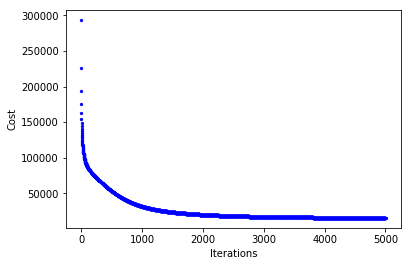

In [14]:
df_pred, J_hist = fit_target(df_target)
draw_cost_changes(J_hist)

In [15]:
df_pred

,iid,uid,rating
0,1,1,2.123094
1,2,1,3.990674
2,3,1,3.449184
3,4,1,3.109673
4,5,1,3.996614
5,6,1,3.325158
6,7,1,3.555438
7,8,1,3.019699
8,9,1,2.652918
9,10,1,3.884727


In [18]:
existing_unique_values = np.array(sorted(df_filmtrust['rating'].unique()))
def round_to_existing(val):
    return existing_unique_values[np.argmin(np.abs(existing_unique_values-val))]

df_pred['rating_round']= df_pred['rating'].apply(round_to_existing)
df_pred

,iid,uid,rating,rating_round
0,1,1,2.123094,2.0
1,2,1,3.990674,4.0
2,3,1,3.449184,3.5
3,4,1,3.109673,3.0
4,5,1,3.996614,4.0
5,6,1,3.325158,3.5
6,7,1,3.555438,3.5
7,8,1,3.019699,3.0
8,9,1,2.652918,2.5
9,10,1,3.884727,4.0


## === The same manual implemenation but less code here  (using `fill_missed`) === 
Moved all operations to file

In [108]:
import os, sys
import json
cwd= os.getcwd()
path_to_common_dir = os.path.dirname(os.path.dirname(cwd))
sys.path.append(path_to_common_dir)

from collaborative_filtering_d import fill_missed

In [110]:
df_filmtrust = get_data()
test_data = pd.DataFrame([
    [1, 1],
    [1, 2],
    [2, 1],
    [1, 10],
    [4, 25],
    [60, 40]], columns=['uid', 'iid'])

# df_filmtrust=df_filmtrust[['iid','uid','rating']]
df_pred_manual, _J_hist= fill_missed (
    df_input= df_filmtrust, 
    df_missed = test_data, 
    compute_average_for_blank_columns= True, 
    n_features=20, 
    max_iter=2000, 
    return_J_hist= True)

print (len(df_pred_manual))
df_pred_manual


len(df_filmtrust)= 35,497
index: uid, columns: iid, values: rating
Running gradient descent with alpha= 0.0005, lambda= 1, eps= 0.01, max_iter= 2000
50: 93703.556394833
100: 86108.5885751723
150: 81604.90924908048
200: 77560.8372189874
250: 73567.65258544577
300: 69597.4577620297
350: 65706.71591126657
400: 61956.63418991108
450: 58385.44066050025
500: 55007.50509879383
550: 51825.363012841306
600: 48840.19789246062
650: 46055.56893354609
700: 43476.094837325305
750: 41104.552011019725
800: 38939.671080105385
850: 36975.36155132516
900: 35201.19614779155
950: 33603.62600451351
1000: 32167.367244131612
1050: 30876.585283965447
1100: 29715.741453658717
1150: 28670.12817264109
1200: 27726.17753726359
1250: 26871.617892038274
1300: 26095.52433416029
1350: 25388.293509036343
1400: 24741.5691796977
1450: 24148.140335198827
1500: 23601.825368330385
1550: 23097.349214526475
1600: 22630.218201563177
1650: 22196.59799407422
1700: 21793.20051726005
1750: 21417.18473663059
1800: 21066.073961227594

,uid,iid,rating,rating_pred_round,rating_pred
0,1,1,2.0,2.0,2.123419
1,1,2,4.0,4.0,4.046248
2,2,1,NaN,2.0,2.248845
3,1,10,4.0,4.0,3.947265
4,4,25,NaN,2.0,1.953039
5,60,40,NaN,2.5,2.366644


## === Using `surprice`  ===

In [90]:
import os, sys
import json
cwd= os.getcwd()
path_to_common_dir = os.path.dirname(os.path.dirname(cwd))
sys.path.append(path_to_common_dir)

import collaborative_filtering_surprice_b as cofisu


In [92]:
df_filmtrust = get_data()
test_data = pd.DataFrame([
    [1, 1],
    [1, 2],
    [2, 1],
    [1, 10],
    [4, 25],
    [60, 40]], columns=['uid', 'iid'])


df_pred = cofisu.fill_missed(df_filmtrust, test_data)
df_pred

len(df_filmtrust)= 35,497
index: uid, columns: iid, values: rating


,uid,iid,rating_pred
0,1,1,3.188811
1,1,2,3.622581
2,2,1,2.793608
3,1,10,3.458407
4,4,25,2.687536
5,60,40,2.883661


In [93]:
# lets test on input data 
df_pred = cofisu.fill_missed(df_filmtrust, df_filmtrust)

index: uid, columns: iid, values: rating


In [96]:
df_res= df_pred.merge(df_filmtrust, on= (['uid','iid']))
df_res

,uid,iid,rating_pred,rating
0,1.0,1.0,3.150692,2.0
1,1.0,2.0,3.720319,4.0
2,1.0,3.0,3.277236,3.5
3,1.0,4.0,3.519881,3.0
4,1.0,5.0,3.524623,4.0
5,1.0,6.0,3.281582,3.5
6,1.0,7.0,3.236549,3.5
7,1.0,8.0,3.374228,3.0
8,1.0,9.0,3.330737,2.5
9,1.0,10.0,3.338304,4.0


## Compare R2 score 

In [98]:
from sklearn.metrics import r2_score

In [123]:
r2_score(df_res['rating'], df_res['rating_pred'])  

AttributeError: 'Series' object has no attribute 'contiguous'

In [104]:
df_pred_manual['rating_pred_round'].unique()


array([2. , 4. , 3. , 3.5, 1. , 2.5, 1.5, 0.5])

In [106]:
df_pred_manual['rating'].unique()

array([2. , nan, 3. , 1. , 2.5, 4. , 3.5, 1.5, 0.5])

In [107]:
# need to dropna since it returns all combinations but not only requested  - or just set df_missed  the same as df_input
r2_score(df_pred_manual.dropna()['rating'], df_pred_manual.dropna()['rating_pred_round'])  


0.8581286078865904

In [140]:
y_true= np.array([1, 2, 3, 9])
y_pred=  np.array([2, 1, 4, 8])
r2_score(y_true, y_pred)


AttributeError: 'numpy.ndarray' object has no attribute 'contiguous'

## Conclusion: 

- Manual r2_score = 0.8581286078865904
- Surprise r2_score =  0.48986699862992766

# Using fastai

https://towardsdatascience.com/collaborative-filtering-with-fastai-3dbdd4ef4f00

## EmbeddingDotBias Model
FastAI provides **two different types** of collab models. 
- A simple model called EmbeddingDotBias which used for almost all recommendation systems a few years ago. It creates embeddings for both users and books and then takes the dot product of them. 
- The second is a neural network based model which uses embeddings and fully-connected layers.

An embedding is a mapping from discrete objects, such as words or ids of books and users in our case, to a vector of continuous values. This can be used to find similarities between the discrete objects, that wouldn’t be apparent to the model if it didn’t use embedding layers.
These embedding vectors are low-dimensional and get updated whilst training the network.

Both models can be created using the collab_learner class. Standardly the **use_nn** argument is set to false and therefore we are creating an **EmbeddingDotBias** model.

As further arguments, we can pass the collab learner the **n_factors** argument which represents the size of the embedding vectors as well as the **yrange** argument which specifies the range of the rating values we found earlier.


### Switch to colab to train on gpu 

https://colab.research.google.com/drive/1NNwPzIbnL24Fr9pAjy5vXdP_43LJEXb3

learn.fit_one_cycle(5, 1e-1) # ???

### Actually it is also not the option 
Lets continue here with less dadatset 

In [423]:
import pandas as pd
def get_data():
    df_filmtrust = pd.read_csv ('filmtrust/ratings.txt',sep= ' ',names= ['uid', 'iid', 'rating'])
    print ('len(df_filmtrust)= {:,}'.format(len(df_filmtrust)))
    return df_filmtrust

df_filmtrust = get_data()
df_filmtrust.head()

len(df_filmtrust)= 35,497


,uid,iid,rating
0,1,1,2.0
1,1,2,4.0
2,1,3,3.5
3,1,4,3.0
4,1,5,4.0


## Create CollabDataBunch

In [290]:
from fastai.collab import *

df_test= df_filmtrust.iloc[:,:2] # Change here to set the requested prediction Note: You may provide just 2 columns 

data = CollabDataBunch.from_df(df_filmtrust, seed=42, valid_pct=0.1, 
                               user_name='uid', 
                               item_name='iid',
                               rating_name='rating',
                              test=df_test)
data.show_batch(10)

uid,iid,target
1336,2025,3.5
1081,250,1.5
1335,215,3.0
509,1315,2.5
53,207,4.0
544,251,4.0
64,8,3.5
1182,10,2.5
404,235,4.0
510,638,3.5


In [425]:
# print ('len(data.test_ds={:,}'.format(len(data.test_ds)))
# print('# review sample ')
# print (data.train_ds[2])
# print('# get uid and iid ')
# print (data.train_ds[2][0])
# print('# get label')
# print (data.train_ds[2][1])
# print('# get values of uid and iid')
# print (np.array(data.train_ds[2][0].data))
# print('# get values of label')
# print (data.train_ds[2][1].obj)






In [162]:
# ratings.rating.min(), ratings.rating.max()
# rating_min,rating_max=  = df_filmtrust.rating.min(),df_filmtrust.rating.max()

(0.5, 4.0)

## Create learner 

In [430]:
rating_min,rating_max = df_filmtrust.rating.min(),df_filmtrust.rating.max()
learn = collab_learner(data, n_factors=20, y_range=(rating_min,rating_max), wd=1e-1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


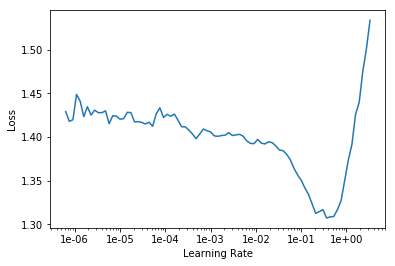

In [431]:
learn.lr_find() # find learning rate
learn.recorder.plot() # plot learning rate graph

## Train model 

In [435]:
learn.fit_one_cycle(10, 1e-5)

epoch,train_loss,valid_loss,time
0,0.254790,0.663179,00:02
1,0.258418,0.663182,00:02
2,0.254484,0.663195,00:02
3,0.251575,0.663207,00:02
4,0.258090,0.663216,00:02
5,0.254645,0.663220,00:02
6,0.247864,0.663228,00:02
7,0.259835,0.663231,00:02
8,0.250234,0.663232,00:02
9,0.255079,0.663232,00:02


In [434]:
#     Save model
learn.save('loss_29_66')

# load in EmbeddingDotBias model
# learn = collab_learner(data, n_factors=40, y_range=(0.5, 4.0), wd=1e-1, model_dir="models/", path="./")
# learn.load('good_movies');

## Predict

In [436]:

df_test_pred= pd.DataFrame()
for batch in iter(data.test_dl):    
# (uids, iids), _ =  next(iter(data.test_dl))
    (uids, iids), _ = batch
    preds= learn.model(uids, iids)
    preds = np.array(preds.data)
    uids = np.array(uids.data)
    iids = np.array(iids.data)
    
    df = pd.DataFrame({'uid':uids, 'iid':iids,'rating_pred': preds })
    df_test_pred = df_test_pred.append (df, ignore_index=True)

df_test_pred= df_test_pred.reset_index(drop= True)
print ('len(df_test_pred)={:,}'.format(len(df_test_pred)))
       
# preds= learn.model(uids, iids)
# np.array(preds.data).shape
df_test_pred.head(10)


len(df_test_pred)=35,497


,uid,iid,rating_pred
0,1,1,2.866625
1,1,2,3.466624
2,1,3,3.242552
3,1,4,3.167890
4,1,5,3.144618
5,1,6,2.809930
6,1,7,3.303068
7,1,8,2.970388
8,1,9,3.011630
9,1,10,3.284331


## Evaluate (compare with provided values )

In [437]:
df_fastai= df_test_pred.merge(df_filmtrust, on = (['uid','iid']))
df_fastai.head(100)

,uid,iid,rating_pred,rating
0,1,1,2.866625,2.0
1,1,2,3.466624,4.0
2,1,3,3.242552,3.5
3,1,4,3.167890,3.0
4,1,5,3.144618,4.0
5,1,6,2.809930,3.5
6,1,7,3.303068,3.5
7,1,8,2.970388,3.0
8,1,9,3.011630,2.5
9,1,10,3.284331,4.0


In [438]:
from sklearn.metrics import r2_score

In [439]:
r2_score(df_fastai['rating'], df_fastai['rating_pred'])  

-0.2703098040122631

In [188]:
for p in list(zip(np.array(preds), np.array(ratings))):
    print (p[0],p[1])

2.850474 3.5
2.5893834 3.0
3.0674453 3.0
3.3246536 4.0
3.1668148 4.0
3.7284217 4.0
2.6167355 2.5
2.7664928 0.5
3.2292726 4.0
2.7768624 3.5
3.1621215 3.5
3.3470476 3.0
2.8374124 4.0
2.1644902 0.5
2.3005333 3.5
2.330257 1.5
3.0332644 4.0
2.568147 0.5
2.4977336 2.5
3.3639655 4.0
3.3063104 3.0
3.566785 3.5
2.6567872 4.0
2.3347526 3.5
3.3117082 3.5
2.6978798 4.0
2.5661912 4.0
3.0555913 3.0
2.548923 2.0
2.5426645 3.0
3.6359775 3.5
3.6539273 4.0
3.3733444 3.5
3.424492 3.0
2.6375701 4.0
3.467981 4.0
3.6652837 4.0
2.3384643 0.5
2.8509192 4.0
2.5176485 4.0
2.374801 3.0
2.6218119 1.0
3.1872685 2.0
2.710928 4.0
3.1584857 3.5
2.6178734 3.0
3.5498657 3.5
3.4637916 3.0
3.806219 4.0
2.3510482 4.0
3.0191622 3.0
3.2900124 4.0
3.6651511 4.0
2.5626419 1.0
3.1715062 4.0
3.6988735 4.0
3.192726 2.5
2.5381258 3.0
3.3074522 2.0
3.4911282 3.0
3.1362317 4.0
3.0433202 4.0
3.199286 4.0
2.946834 3.5


## So using separate file with implementation

/Users/new/science/studies/otsebriy/conductor_tools/collaborative_filtering_fastai.py

In [487]:
import os, sys
import json
cwd= os.getcwd()
path_to_common_dir = os.path.dirname(os.path.dirname(cwd))
sys.path.append(path_to_common_dir)

from collaborative_filtering_fastai import fill_missed

def get_data():
    df_filmtrust = pd.read_csv('/Users/new/science/studies/otsebriy/conductor_tools/cats/1895_estimate_msv_for_pmi_keywords/filmtrust/ratings.txt', sep=' ', names=['uid', 'iid', 'rating'])
    print('len(df_filmtrust)= {:,}'.format(len(df_filmtrust)))
    print ('First samples:')
    print(df_filmtrust.head(10))
    return df_filmtrust

df_filmtrust = get_data()
df_filmtrust
test_data = pd.DataFrame([
    [1, 1],
    [1, 2],
    [2, 1],
    [1, 10],
    [4, 25],
    [60, 40]], columns=['uid', 'iid'])


df_pred  = fill_missed(df_filmtrust, test_data, use_nn=True)


df_pred



len(df_filmtrust)= 35,497
First samples:
   uid  iid  rating
0    1    1     2.0
1    1    2     4.0
2    1    3     3.5
3    1    4     3.0
4    1    5     4.0
5    1    6     3.5
6    1    7     3.5
7    1    8     3.0
8    1    9     2.5
9    1   10     4.0
index: uid, columns: iid, values: rating
Using EmbeddingNN Model

Training model...


epoch,train_loss,valid_loss,time
0,0.712692,0.705536,00:06
1,0.710991,0.779400,00:05
2,0.714788,0.676320,00:06
3,0.685499,0.805417,00:06
4,0.614104,0.645391,00:06
5,0.621046,0.652910,00:06
6,0.557227,0.653410,00:06
7,0.509027,0.651859,00:06
8,0.446726,0.654279,00:05
9,0.392214,0.681605,00:05



Fine tuning...


epoch,train_loss,valid_loss,time
0,0.388555,0.678732,00:05
1,0.395841,0.692855,00:06
2,0.398383,0.685925,00:07
3,0.398217,0.681382,00:06
4,0.387362,0.693755,00:06
5,0.400370,0.683804,00:06
6,0.399005,0.680298,00:06
7,0.410144,0.683342,00:06
8,0.411283,0.680965,00:06
9,0.400709,0.674517,00:06



R2 score = -0.3079793034262268


## fastai R2 score = -0.3079793034262268

In [ ]:
## todo try to multiply the 